<a href="https://colab.research.google.com/github/hsnbnaa/deep-learning-is-easy/blob/main/Hands-on%20Machine%20Learning%20with%20Scikit-Learn%2C%20Keras%20%26%20TensorFlow/Chapter%2012/12_custom_models_and_training_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# Tensors bisa dibuat dari list atau array NumPy
t = tf.constant([[1., 2., 3.], [4., 5., 6.]]) # Tensor konstan

# Operasi matematika
print(t + 10)
print(tf.square(t))
print(t @ tf.transpose(t)) # Perkalian matriks

tf.Tensor(
[[11. 12. 13.]
 [14. 15. 16.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[ 1.  4.  9.]
 [16. 25. 36.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[14. 32.]
 [32. 77.]], shape=(2, 2), dtype=float32)


In [2]:
# Fungsi Python biasa
def cubed(x):
    return x ** 3

# Mengubahnya menjadi TensorFlow Function (Graph)
tf_cubed = tf.function(cubed)

# Menjalankan fungsi yang sudah dioptimalkan
print(tf_cubed(tf.constant(2.0)))

tf.Tensor(8.0, shape=(), dtype=float32)


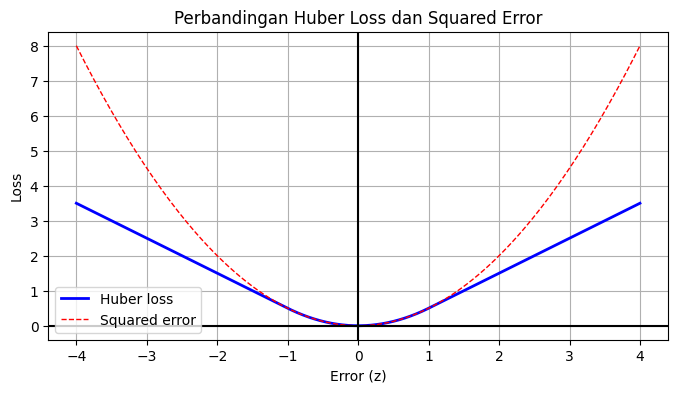

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Definisi fungsi Huber loss
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

# Membuat data untuk plotting
z = tf.linspace(-4.0, 4.0, 200)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(z, huber_fn(0., z), "b-", linewidth=2, label="Huber loss")
plt.plot(z, z**2 / 2, "r--", linewidth=1, label=r"Squared error")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.xlabel("Error (z)")
plt.ylabel("Loss")
plt.legend()
plt.title("Perbandingan Huber Loss dan Squared Error")
plt.grid(True)
plt.show()